# Xiaowen Hu's Individual Project Planning 
# Group 22 student number: 77277085

## (1) Data Description:

### Importing Data

In [2]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=13xAnb3PfXqkAetPf98Vg78ZIiop-G2ed'
players <- read_csv(url)
head(players)
url = 'https://drive.google.com/uc?export=download&id=1dv4qRoAnWFwu4fXoNNRrL8VZobFVV2TA'
sessions <- read_csv(url)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [12]:
dim(players)
colnames(players)

[1] 196   7

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

In [6]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |> summarize(max(played_hours), min(played_hours), max(Age), min(Age))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max(played_hours),min(played_hours),max(Age),min(Age)
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,NA,NA


In [3]:
players_summary <- players|>
summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
          sd_played_hours = sd(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE),
          sd_age = sd(Age, na.rm = TRUE))|>
round(2)
players_summary

mean_played_hours,sd_played_hours,mean_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,21.14,7.39


In [5]:
sessions_summary <- sessions|>
summarize(mean_o_start_time = mean(original_start_time, na.rm=TRUE),
         sd_o_start_time = sd(original_start_time, na.rm=TRUE),
         mean_o_end_time = mean(original_end_time, na.rm=TRUE),
         sd_o_end_time = sd(original_end_time, na.rm=TRUE))
sessions_summary

mean_o_start_time,sd_o_start_time,mean_o_end_time,sd_o_end_time
<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,3557491589,1.719196e+12,3552813134


We work with two datasets: players.csv (196 players, 7 variables) and sessions.csv (1535 session records, 5 variables). The players dataset contains one row per player, with variables describing age, gender, experience level (Regular/Amateur/Veteran/Pro), subscription status, and self-reported played hours. The sessions dataset contains one row per play session, including the player ID and timestamps marking the start and end of each session.

The datasets are linked by hashedEmail, allowing us to match each player with their corresponding sessions. Missing values are minimal and variable formats are generally clean. To study each player’s contribution, we compute total play time by summing session durations:
(original\_end\_time - original\_start\_time) / 60000
grouped by hashedEmail.
This produces a player-level measure of gameplay contribution, which we will compare across different player characteristics.


## （2）Questions

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Broad Question: Which types of players contribute the most gameplay data?

Specific Question: Does a player’s experience level and played hours relate to how much total play time they contribute?

By aggregating total session play time per player and comparing it across player attributes, we aim to identify which groups tend to generate more data. This is relevant for recruitment strategies where targeting high-contribution players can optimize future data collection.


## (3) Exploratory Data Analysis and Visualization

In [7]:
# To Calculate sessions' minutes each time
sessions_clean <- sessions |>
mutate(session_minutes = (original_end_time - original_start_time) / 60000)

# By player summary: Total duration + number of sessions
player_contrib <- sessions_clean |>
group_by(hashedEmail) |>
summarise(total_minutes = sum(session_minutes, na.rm = TRUE),
session_count = n(), .groups = "drop")

# Merge back into the player information table
player_data <- players |>
left_join(player_contrib, by = "hashedEmail")

player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_minutes,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2000.0000,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,166.6667,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,0.0000,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,0.0000,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,0.0000,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,0.0000,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,0.0000,1


In [8]:
exp_summary <- player_data |>
group_by(experience) |>
summarise(avg_total_minutes = mean(total_minutes, na.rm = TRUE),
avg_session_count = mean(session_count, na.rm = TRUE),
n_players = n())
exp_summary

experience,avg_total_minutes,avg_session_count,n_players
<chr>,<dbl>,<dbl>,<int>
Amateur,646.8254,19.523810,63
Beginner,113.6364,4.818182,35
Pro,227.2727,3.545455,14
Regular,1760.8696,22.565217,36
Veteran,61.7284,1.888889,48


This table could tell us whether Pro could illustrates the longest time of playing games and Amateur could tell the least game playing time.

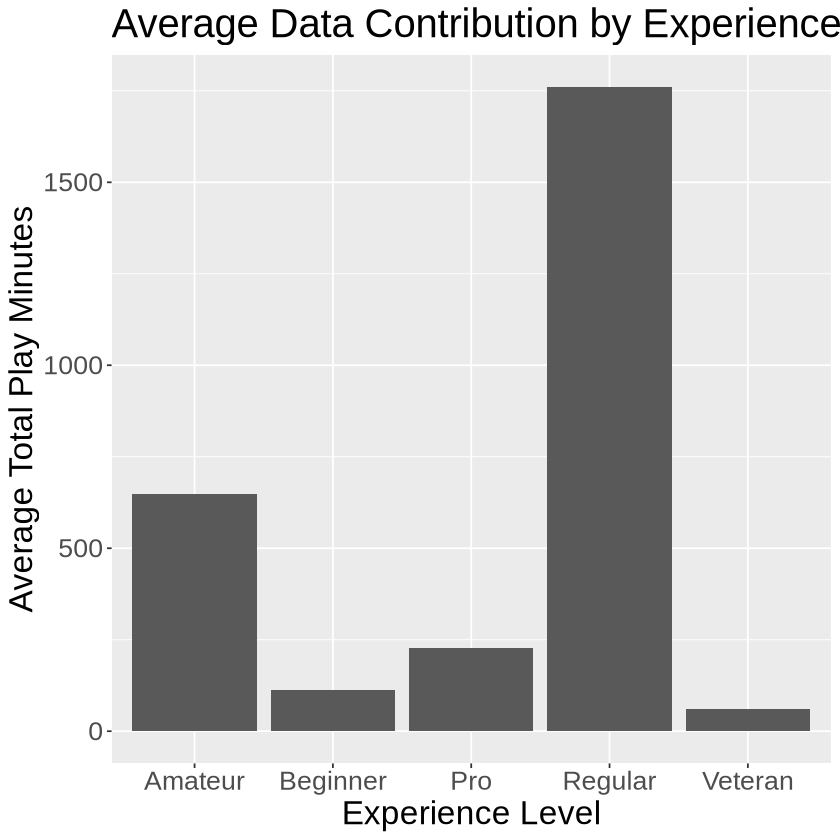

In [10]:
experiences_graph<- ggplot(exp_summary, aes(x = experience, y = avg_total_minutes)) +
geom_col() +
labs(x = "Experience Level", y = "Average Total Play Minutes",
title = "Average Data Contribution by Experience Level") +
theme(text = element_text(size = 20))
experiences_graph

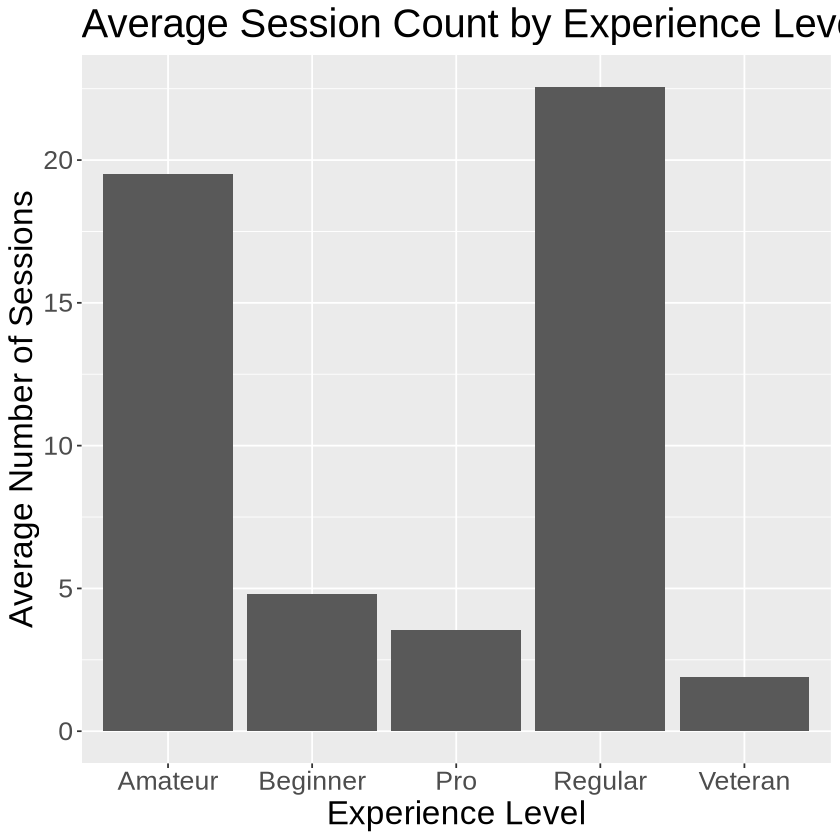

In [11]:
experience_session <- ggplot(exp_summary, aes(x = experience, y = avg_session_count)) +
geom_col() +
labs(x = "Experience Level", y = "Average Number of Sessions",
title = "Average Session Count by Experience Level") +
theme(text = element_text(size = 20))
experience_session

To explore variation in contribution across player groups, we computed summary means for total play time and session count by experience level. We found clear patterns: Regular players contribute the most overall, with the highest average total play time and number of sessions. Amateur players also contribute relatively high play time. In contrast, Beginner, Pro, and Veteran players show noticeably lower average contribution. Interestingly, Pro players do not show high play time despite their skill level, suggesting decreased engagement. Veterans appear to have past experience but low current activity.

Visualization 1: Bar chart of mean total play time by experience group highlights Regular players as the top contributors.  
Visualization 2: Boxplot of session counts by experience group shows similar rankings and variability.

These exploratory analyses suggest that experience level is meaningfully associated with gameplay contribution, and that some “high skill” groups (Pros) do not necessarily play more.

## (4)Methods and Plan

In the final stage of the project, I plan to investigate whether player characteristics can be used to predict total play time per player. Since the response variable (total_minutes) is quantitative, a regression-based predictive model is appropriate. I will first consider a linear regression model using experience level and played_hours as key predictors, and may later compare performance with flexible models such as regression trees if needed.

I will check these assumptions by examining residual plots and influence diagnostics. A potential limitation is that relationships may not be strictly linear; experience level may interact with other variables such as subscription status, which could require transformations or the addition of interaction terms.

For model evaluation, I will split the dataset into training and test sets (e.g. 0.7 split) and compare models using predictive performance metrics such as RMSE. Cross-validation may also be used to reduce variability in model assessment. No modeling will be performed at this planning stage; the goal here is to outline the methodological direction for the final report.

## （5） GitHub link


https://github.com/huxiaowen623-web/Xiaowen-s-dsc100_project_plan.git